TESS_noise.ipynb

Comparing the TESS noise to the theoretical noise

In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

In [2]:
TIC = 'TIC 66818296' #WASP-17 / TIC 66818296
search_result = lk.search_lightcurve(
        target=TIC,
        mission='TESS', author='SPOC')
lc_collection = search_result.download_all()
# lc = lc_collection.stitch(corrector_func=lambda x: x.
#                           remove_nans().normalize(unit='unscaled'))
lc = lc_collection[0]
lc = lc.normalize()
lc = lc.remove_outliers(sigma=10)


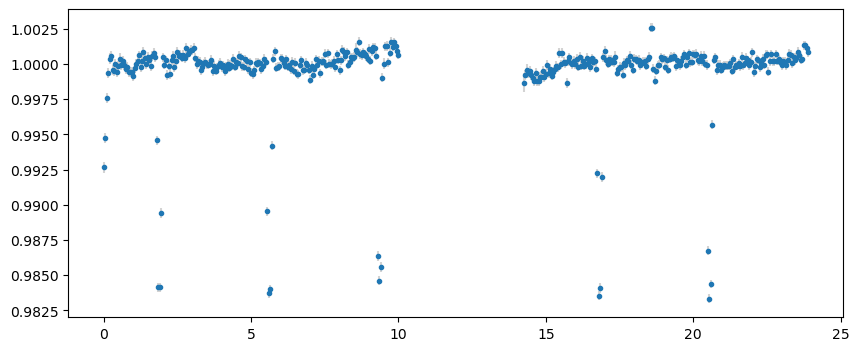

In [3]:
fig = plt.figure(figsize=(10,4))

lc_bin = lc.bin(time_bin_size = 0.05) # Default time is in days
plt.errorbar(lc_bin.time.mjd-lc_bin.time[0].mjd, lc_bin.flux, lc_bin.flux_err, fmt='.', ecolor='LightGrey')
plt.show()

Standard deviation on unbinned data =  0.003522256389260292
Mean error on unbinned data =  0.0019484699005261064
283.90891788828856


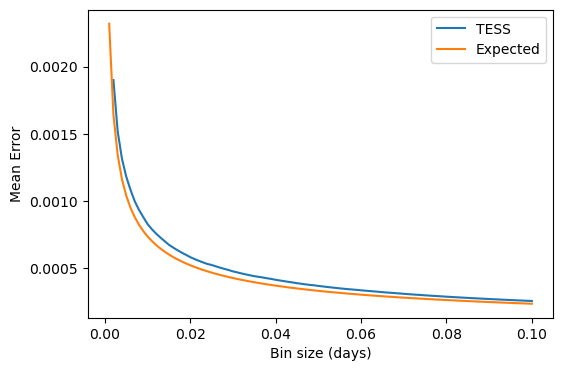

In [4]:
cut = 6000 
fig = plt.figure(figsize=(6,4))

mean = np.mean(lc.flux_err)
scatter = np.std(lc.flux[0:cut]) 
Time_diff = float(str(max(lc.time.mjd[0:cut])-min(lc.time.mjd[0:cut])))

numpoints = 100

exp = np.zeros(numpoints)
MEAN = np.zeros(numpoints)
SD = np.zeros(numpoints) #Standard devitation
BINSIZE = np.zeros(numpoints)
n_inbin = np.zeros(numpoints)
theory_tess_difference = np.zeros(numpoints)

for i in range(numpoints):
    BINSIZE[i] = (i+1)*0.001
    binned_lc = lc.bin(time_bin_size = BINSIZE[i], n_bins=10)
    MEAN[i] = np.mean(binned_lc.flux_err)
    n_inbin[i] =  cut/((Time_diff)/BINSIZE[i])
    exp[i] = mean / ((n_inbin[i])**0.5)
    SD[i] = np.std(binned_lc.flux[0:cut])
    theory_tess_difference[i] = abs(exp[i]-MEAN[i])
    
plt.xlabel('Bin size (days)')
plt.ylabel('Mean Error')
plt.plot(BINSIZE, MEAN, label='TESS')
plt.plot(BINSIZE, exp, label='Expected')
#plt.plot(BINSIZE, SD)
plt.legend()

print('Standard deviation on unbinned data = ', scatter)
print('Mean error on unbinned data = ', mean)
print(1/scatter)

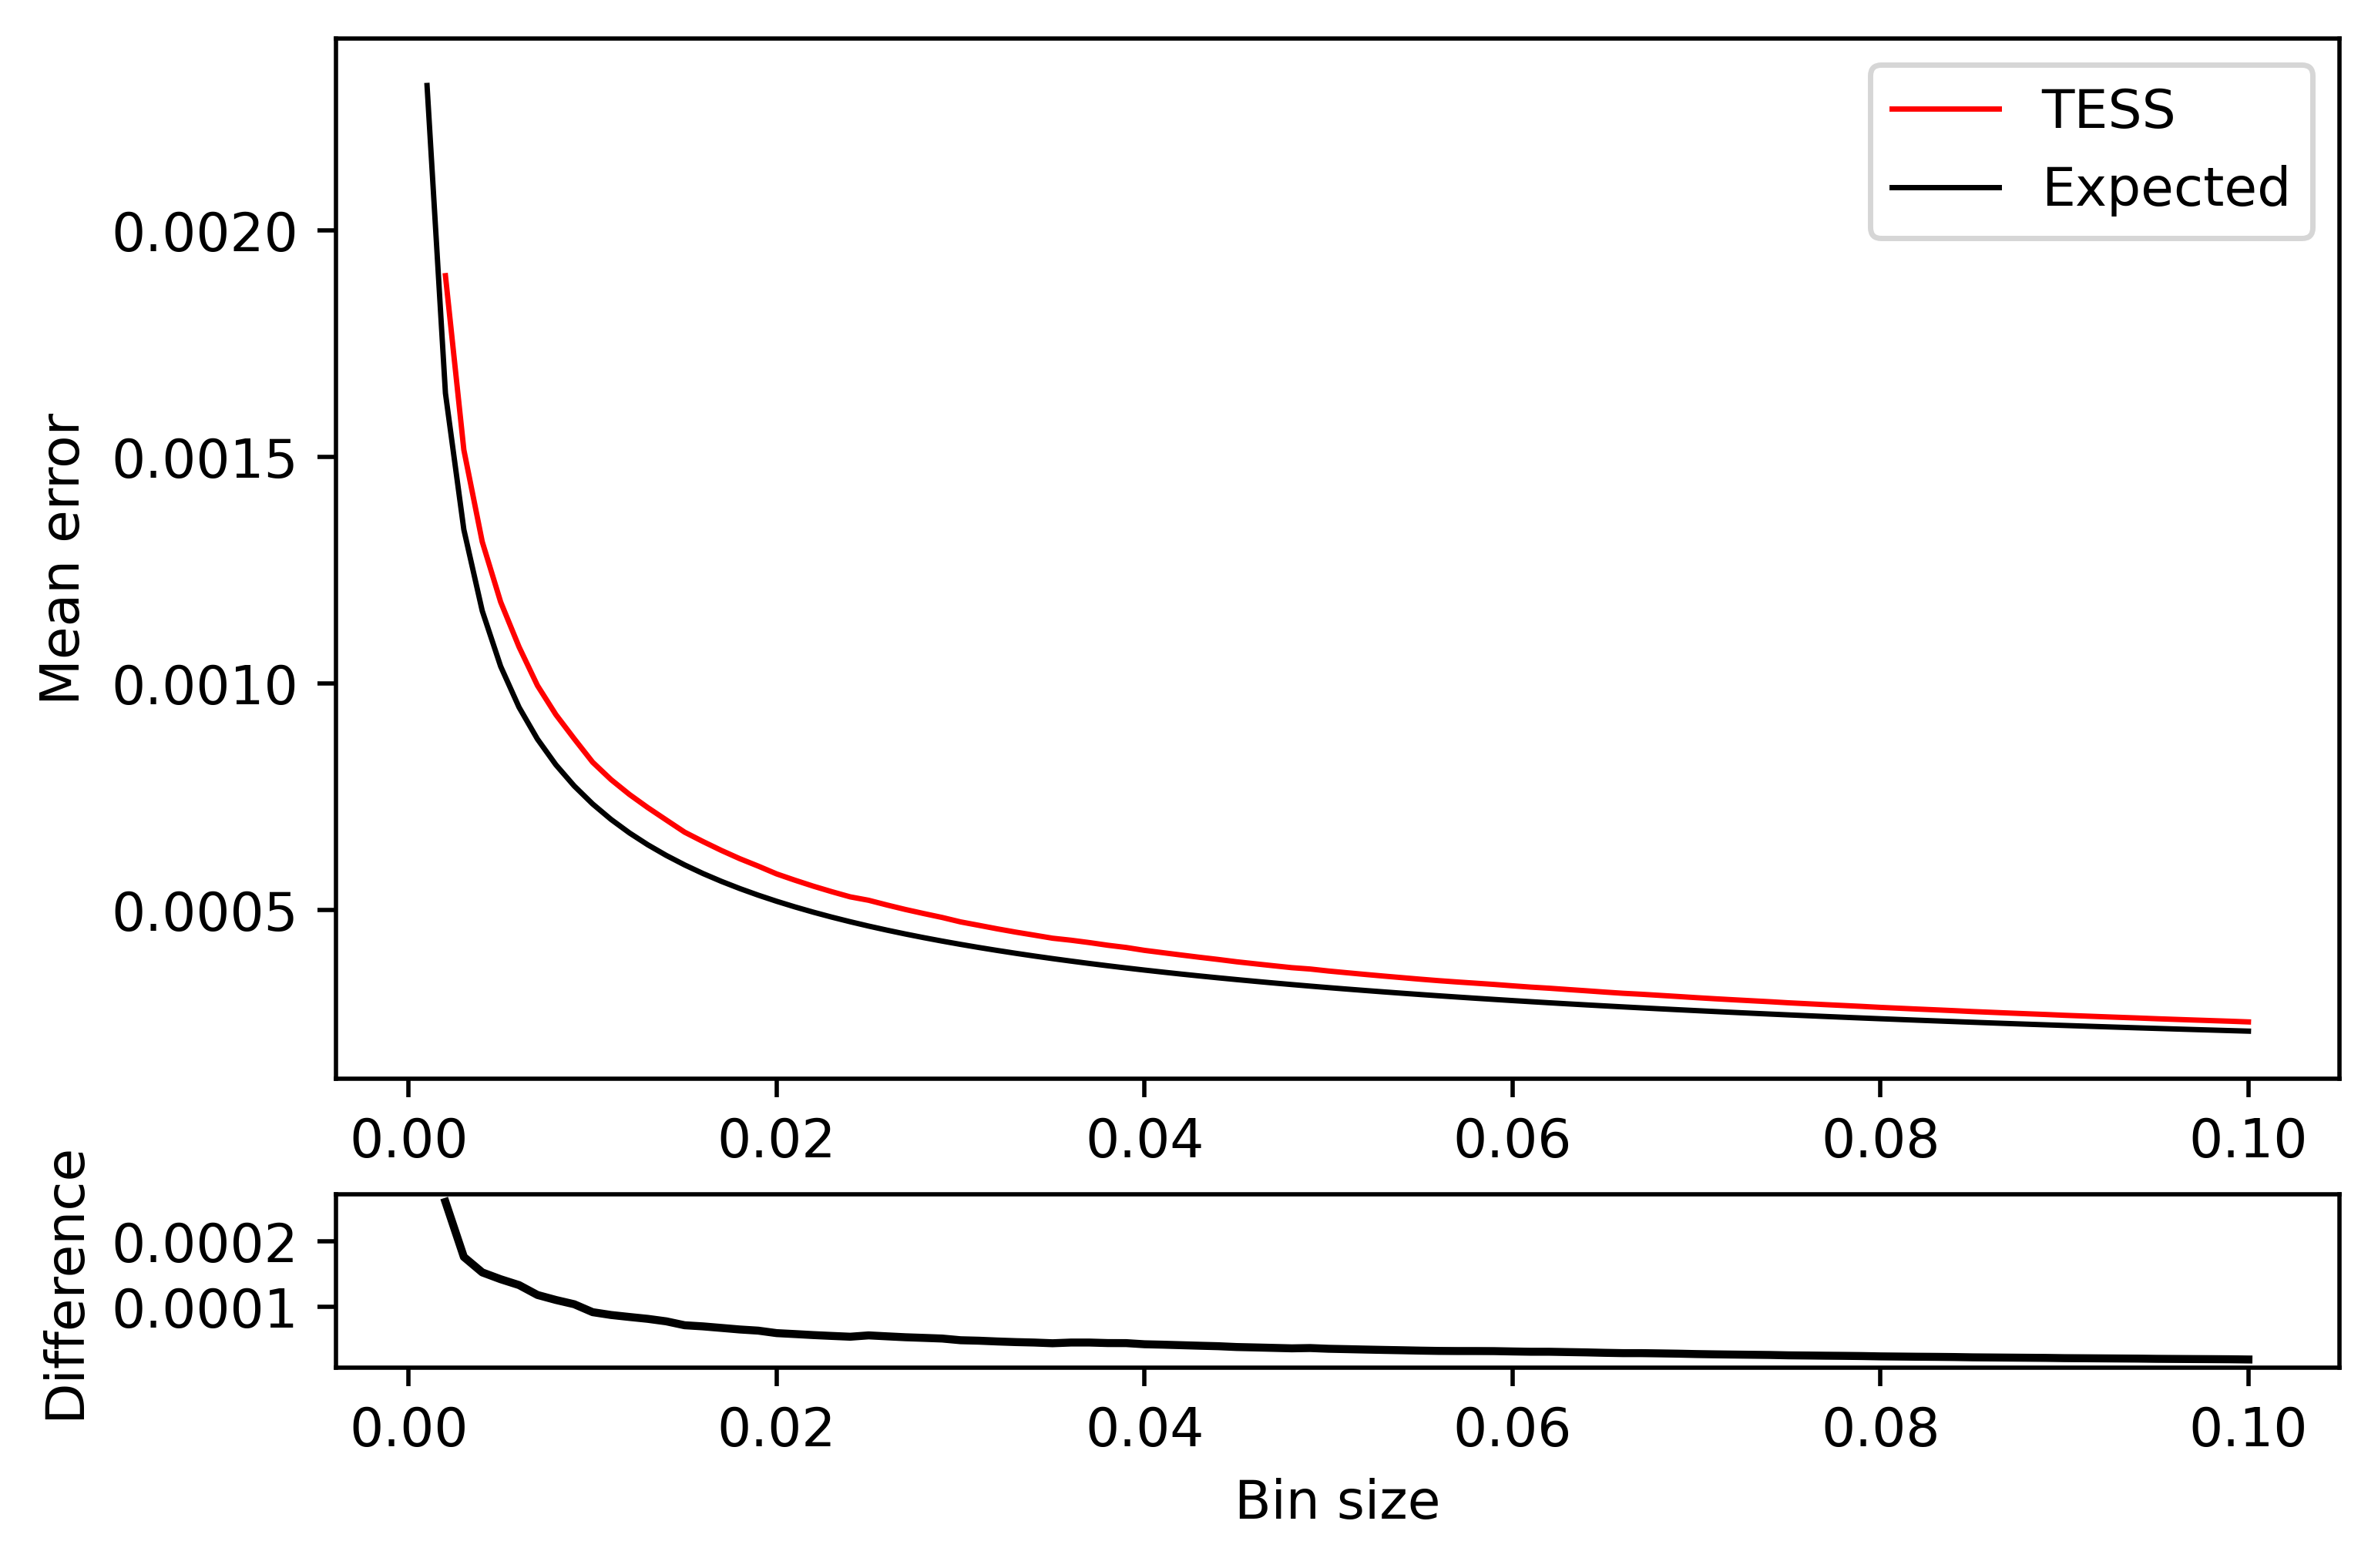

In [5]:
#Panel settings
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -1.15

rect = [left, bottom, width, height]
rect_res = [left, bottom+height+spacing, width, 0.15]

fig = plt.figure(figsize=(8, 3), dpi=500)
ax = fig.add_axes(rect)

ax_res = fig.add_axes(rect_res, sharex=ax)

#Top panel
ax.plot(BINSIZE, MEAN, color='red',label="TESS", lw=1)
ax.plot(BINSIZE, exp, color='black',label="Expected", lw=1)
ax.set(ylabel = "Mean error")
# ax.set_xlim((min(x), max(x)))
ax.legend()

#Bottom panel
ax_res.plot(BINSIZE, theory_tess_difference, color='black')
# ax_res.set_ylim((-abs(max(theory_tess_difference.all(), exp))*1.2, abs(max(theory_tess_difference.all(), exp))*1.2))
ax_res.set(xlabel="Bin size", ylabel="Difference")

plt.show()